In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [119]:
# Load the data
df = pd.read_csv('best_fitness_sublist_df.csv', index_col=None, header=0)
print(df.head())

              1            50           100           150           200  \
0  9.152567e+08  2.924126e+08  1.299142e+08  6.417488e+07  3.415174e+07   
1  1.077707e+09  3.580456e+08  1.640735e+08  8.742370e+07  5.252735e+07   
2  9.569201e+08  3.005727e+08  1.305862e+08  8.269918e+07  5.326927e+07   
3  1.016850e+09  3.162292e+08  1.123450e+08  7.887601e+07  4.943015e+07   
4  1.024720e+09  3.220951e+08  1.678182e+08  9.907548e+07  5.942760e+07   

            250           300           350           400           450  ...  \
0  1.787178e+07  9.014610e+06  4.877578e+06  3.075118e+06  1.752351e+06  ...   
1  2.445500e+07  1.206373e+07  7.368348e+06  3.154165e+06  1.733565e+06  ...   
2  3.187146e+07  1.880901e+07  1.015042e+07  5.065898e+06  2.835877e+06  ...   
3  2.632301e+07  1.429097e+07  7.155996e+06  3.942256e+06  2.387468e+06  ...   
4  3.271335e+07  1.922929e+07  1.165604e+07  6.722713e+06  3.595421e+06  ...   

   1600  1650  1700  1750  1800  1850  1900  1950  Algorithm  Functi

In [120]:
# move df['Algorithm'] to the first column, df['Function'] to the second column
cols = list(df)
cols.insert(0, cols.pop(cols.index('Algorithm')))
cols.insert(1, cols.pop(cols.index('Function')))
df = df.loc[:, cols]
print(df.head())

  Algorithm Function             1            50           100           150  \
0  Baseline       F5  9.152567e+08  2.924126e+08  1.299142e+08  6.417488e+07   
1  Baseline       F5  1.077707e+09  3.580456e+08  1.640735e+08  8.742370e+07   
2  Baseline       F5  9.569201e+08  3.005727e+08  1.305862e+08  8.269918e+07   
3  Baseline       F5  1.016850e+09  3.162292e+08  1.123450e+08  7.887601e+07   
4  Baseline       F5  1.024720e+09  3.220951e+08  1.678182e+08  9.907548e+07   

            200           250           300           350  ...  1500  1550  \
0  3.415174e+07  1.787178e+07  9.014610e+06  4.877578e+06  ...   NaN   NaN   
1  5.252735e+07  2.445500e+07  1.206373e+07  7.368348e+06  ...   NaN   NaN   
2  5.326927e+07  3.187146e+07  1.880901e+07  1.015042e+07  ...   NaN   NaN   
3  4.943015e+07  2.632301e+07  1.429097e+07  7.155996e+06  ...   NaN   NaN   
4  5.942760e+07  3.271335e+07  1.922929e+07  1.165604e+07  ...   NaN   NaN   

   1600  1650  1700  1750  1800  1850  1900  1950 

In [121]:
# set [algorithm, function] as index
df.set_index(['Algorithm', 'Function'], inplace=True)
print(df.head())

                               1            50           100           150  \
Algorithm Function                                                           
Baseline  F5        9.152567e+08  2.924126e+08  1.299142e+08  6.417488e+07   
          F5        1.077707e+09  3.580456e+08  1.640735e+08  8.742370e+07   
          F5        9.569201e+08  3.005727e+08  1.305862e+08  8.269918e+07   
          F5        1.016850e+09  3.162292e+08  1.123450e+08  7.887601e+07   
          F5        1.024720e+09  3.220951e+08  1.678182e+08  9.907548e+07   

                             200           250           300           350  \
Algorithm Function                                                           
Baseline  F5        3.415174e+07  1.787178e+07  9.014610e+06  4.877578e+06   
          F5        5.252735e+07  2.445500e+07  1.206373e+07  7.368348e+06   
          F5        5.326927e+07  3.187146e+07  1.880901e+07  1.015042e+07   
          F5        4.943015e+07  2.632301e+07  1.429097e+07  7

In [122]:
df = df.stack()
print(df)

Algorithm  Function     
Baseline   F5        1      9.152567e+08
                     50     2.924126e+08
                     100    1.299142e+08
                     150    6.417488e+07
                     200    3.415174e+07
                                ...     
Baldwin    F21       150   -2.673058e+00
                     1     -2.369210e+00
                     50    -5.442407e+00
                     100   -9.424627e+00
                     150   -9.424627e+00
Length: 6958, dtype: float64


In [123]:
# rename the column name
df = df.reset_index()
df.rename(columns={'level_2': 'Iteration', 0: 'Best Fitness'}, inplace=True)

In [124]:
print(df.head())

  Algorithm Function Iteration  Best Fitness
0  Baseline       F5         1  9.152567e+08
1  Baseline       F5        50  2.924126e+08
2  Baseline       F5       100  1.299142e+08
3  Baseline       F5       150  6.417488e+07
4  Baseline       F5       200  3.415174e+07


In [125]:
print(len(df))

6958


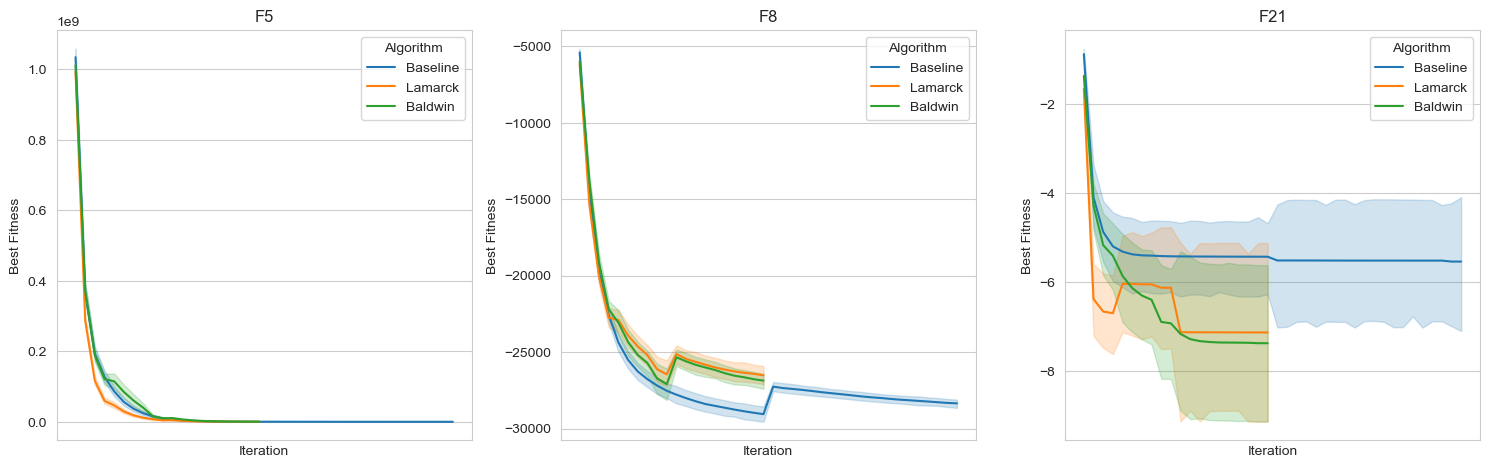

In [126]:
# make lineplot
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
# do not show x ticks
plt.setp(plt.gcf().get_axes(), xticks=[])
plt.savefig('picture1.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

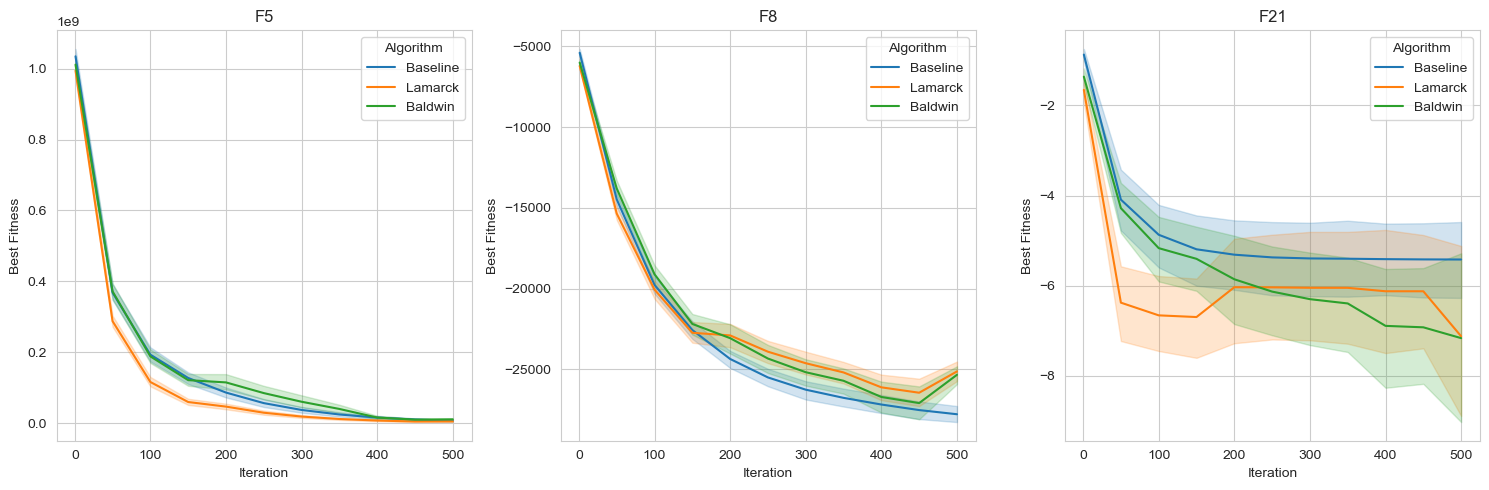

In [127]:
# filter out the first 100 iterations
df['Iteration'] = df['Iteration'].astype(int)
df = df[df['Iteration'] <= 10*50]
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.savefig('picture2.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

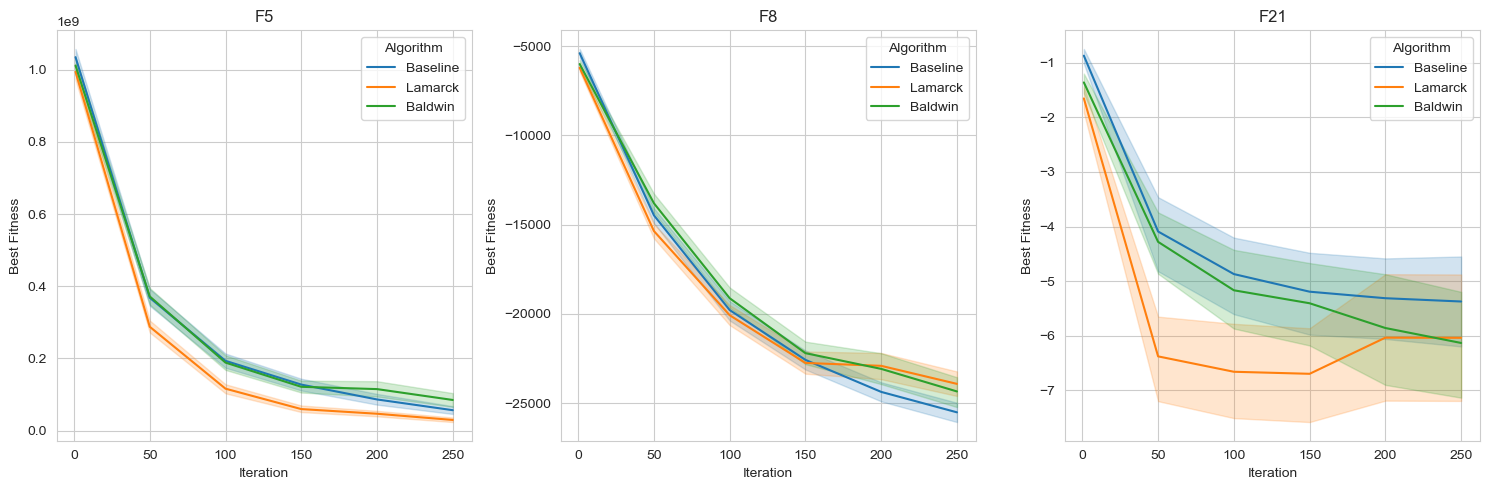

In [128]:
# filter out the first 100 iterations
df['Iteration'] = df['Iteration'].astype(int)
df = df[df['Iteration'] <= 5*50]
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.savefig('picture3.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

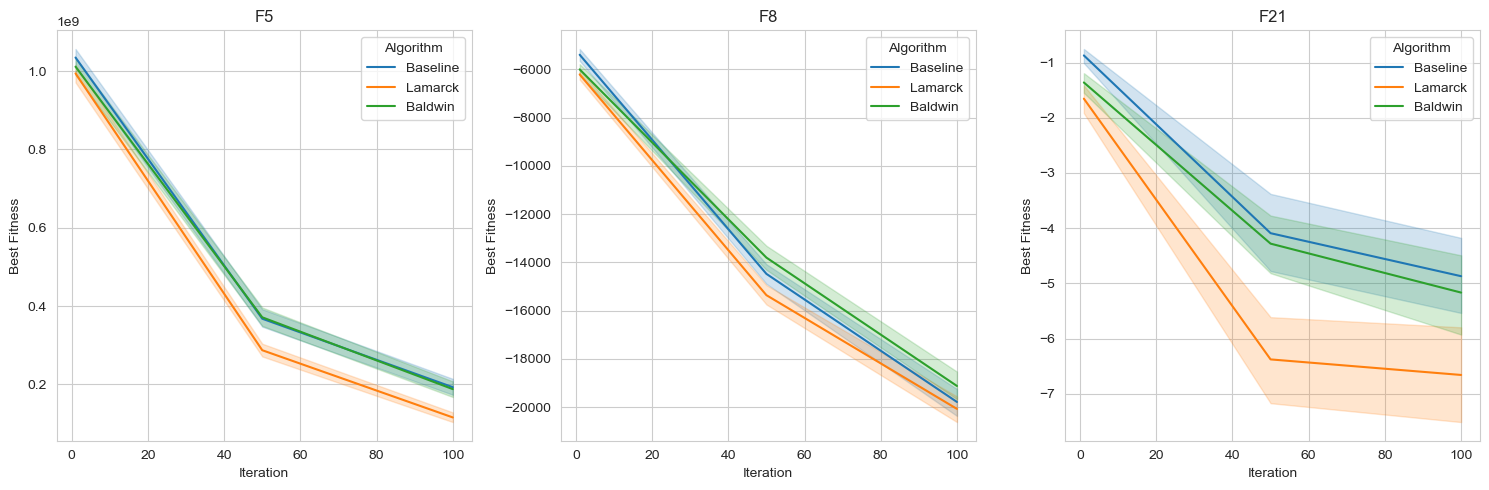

In [129]:
# filter out the first 100 iterations
df['Iteration'] = df['Iteration'].astype(int)
df = df[df['Iteration'] <= 2*50]
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.savefig('picture4.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()